In [16]:
# Homework 1

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dogdf = pd.read_csv('Allegheny_County_2024_Dog_Data.csv', index_col = 0)

In [24]:
dogdf

,Breed,Color,DogName,OwnerZip,Gender,Intact,Age,Weight
License,,,,,,,,
3647543,COCKAPOO,BROWN,CHARLEY,15236,Male,False,94,35
3647545,GER SHEPHERD,WHITE,ELLIE,15238,Female,False,67,76
3647546,MALTESE,WHITE,FURBY,15243,Male,False,44,4
3647547,MALTESE,WHITE,GIZMO,15243,Male,False,25,4
3647551,AM PIT BULL TERRIER,BLACK,JED WAYNE,15229,Male,False,18,65
...,...,...,...,...,...,...,...,...
3714315,BEAGLE,WHITE/BLACK,ABBY,15025,Female,True,70,22
3714316,AM PIT BULL TERRIER,OTHER,LUCKY,15145,Male,True,42,68
3714318,SHIH TZU,CREAM,THEODORE BAYER,15143,Male,True,5,4


In [30]:
dogdf.shape

(34776, 8)

In [27]:
#b.	Create a table, a horizontal bar chart, and a pie chart showing how many Male and Female dogs there are.  Provide good titles and labels in your charts.

In [25]:
gender_counts = dogdf['Gender'].value_counts()
gender_table = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values
})
print(gender_table)

   Gender  Count
0    Male  17942
1  Female  16834


<Axes: title={'center': 'Dogs Gender'}, ylabel='Gender'>

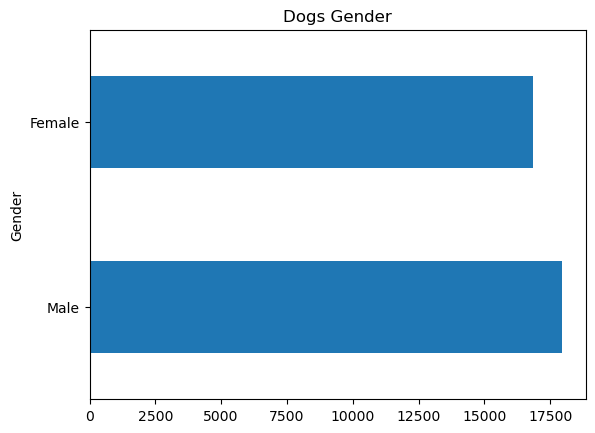

In [34]:
dogdf['Gender'].value_counts().plot(kind='barh', title='Dogs Gender')

<Axes: title={'center': 'Dogs Gender'}>

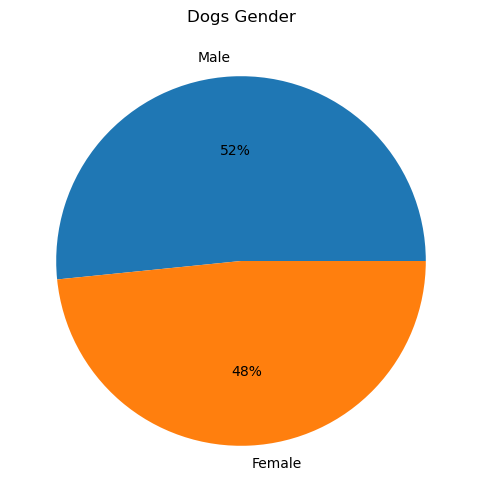

In [29]:
dogdf['Gender'].value_counts().plot(kind='pie', title='Dogs Gender', autopct='%1.0f%%', labels=dogdf['Gender'].value_counts().index, ylabel='', figsize=(6, 6))

In [1]:
# c.	Create a table, a horizontal bar chart, and a pie chart showing how many dogs there are in the 6 ZIPcodes that have the most dogs.  Provide good titles and labels in your charts.

In [15]:
top6_zipcodes = dogdf['OwnerZip'].value_counts().head(6)
top6_zipcodes_df = top6_zipcodes.reset_index()
top6_zipcodes_df.columns = ['OwnerZip', 'Dog Count']
print(top6_zipcodes_df)

   OwnerZip  Dog Count
0     15108       1510
1     15237       1465
2     15044       1365
3     15102       1225
4     15235       1059
5     15146       1057


Text(0, 0.5, 'Owner ZIP Code')

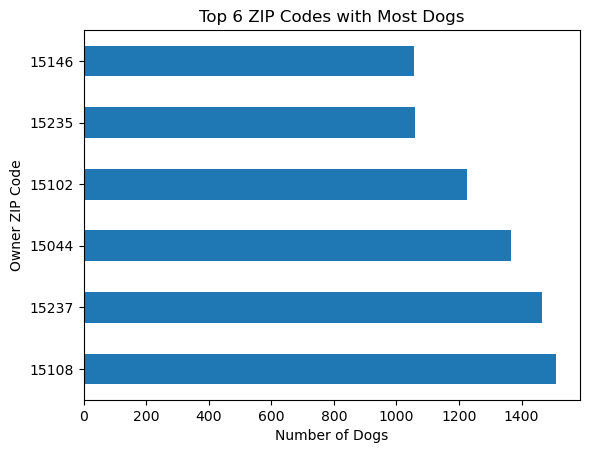

In [17]:
top6_zipcodes.plot(kind='barh', title='Top 6 ZIP Codes with Most Dogs')
plt.xlabel('Number of Dogs')
plt.ylabel('Owner ZIP Code')

<Axes: title={'center': 'Distribution of Dogs in Top 6 ZIP Codes'}, ylabel='count'>

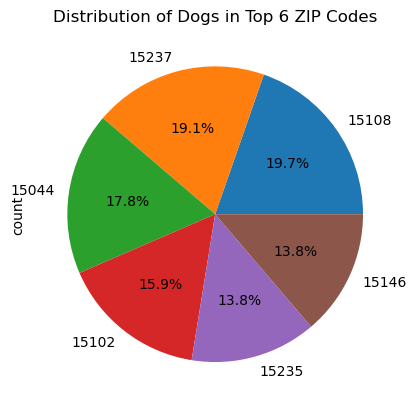

In [19]:
top6_zipcodes.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Dogs in Top 6 ZIP Codes')

In [31]:
# d.	Create a table, a horizontal bar chart, and a pie chart showing the number of adult dogs (12 months or older) that are intact Males, intact Females, neutered Males, and spayed Females.  Provide good titles and labels in your charts

In [43]:
adult_dogs = dogdf[dogdf['Age'] >= 12].copy()  # Adding .copy() to explicitly create a copy

# Create categories based on Gender and Intact status
adult_dogs.loc[:, 'Category'] = adult_dogs.apply(lambda row: f"{'intact' if row['Intact'] else 'sterilized'} {row['Gender']}", axis=1)

# Count the occurrences in each category
category_counts = adult_dogs['Category'].value_counts()
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Dog Count']
print(category_counts_df)

            Category  Dog Count
0  sterilized Female       9602
1    sterilized Male       8945
2        intact Male       7779
3      intact Female       6079


Text(0, 0.5, 'Category')

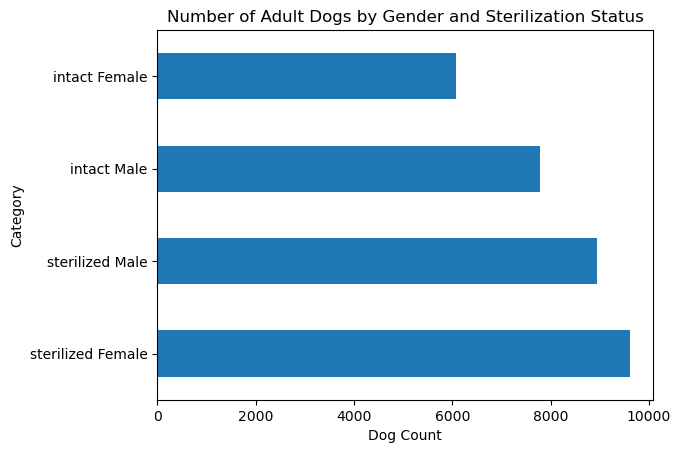

In [51]:
category_counts.plot(kind='barh')
plt.title("Number of Adult Dogs by Gender and Sterilization Status")
plt.xlabel("Dog Count")
plt.ylabel("Category")

Text(0, 0.5, '')

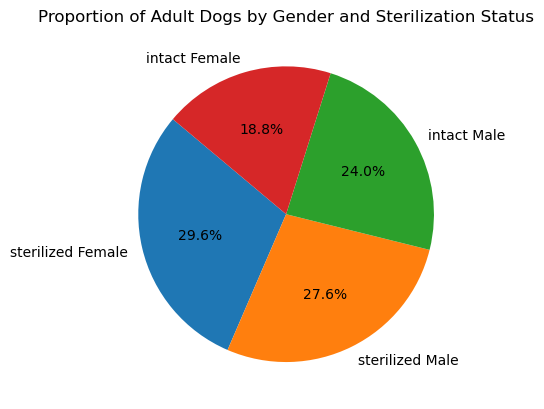

In [53]:
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Adult Dogs by Gender and Sterilization Status")
plt.ylabel('')

In [55]:
# e.	By examining the average weights of fully adult dogs (18 months or older), add a new column to your DataFrame named Category, with values Toy, Small, Medium, Large, and Giant.

In [59]:
fully_adult_dogs = dogdf[dogdf['Age'] >= 18].copy()

def categorize_weight(weight):
    if weight <= 6:
        return 'Toy'
    elif weight <= 20:
        return 'Small'
    elif weight <= 45:
        return 'Medium'
    elif weight <= 90:
        return 'Large'
    else:
        return 'Giant'

# Apply the categorize_weight function to create a 'Category' column
fully_adult_dogs['Category'] = fully_adult_dogs['Weight'].apply(categorize_weight)

# Calculate value counts based on the 'Category' column
category_counts = fully_adult_dogs['Category'].value_counts()
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Dog Count']

# Print the results
print("Table of Fully Adult Dog Counts by Category:")
print(category_counts_df)

# Save the DataFrame to a CSV file
fully_adult_dogs.to_csv('Dogs_with_Category.csv', index=False)
        

Table of Fully Adult Dog Counts by Category:
  Category  Dog Count
0    Large      15288
1    Small       6769
2   Medium       3685
3      Toy       3578
4    Giant       1783


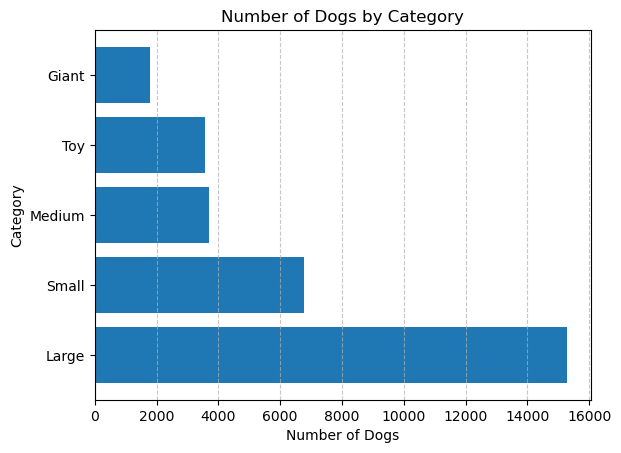

In [61]:
plt.barh(category_counts_df['Category'], category_counts_df['Dog Count'])
plt.title('Number of Dogs by Category')
plt.xlabel('Number of Dogs')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)

Text(0.5, 1.0, 'Distribution of Dogs by Category')

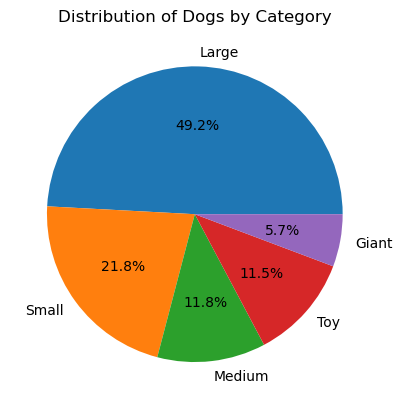

In [63]:
plt.pie(category_counts_df['Dog Count'], labels=category_counts_df['Category'], autopct='%1.1f%%')
plt.title('Distribution of Dogs by Category')

In [69]:
#f.	What is the most popular breed among each of the breed categories, Toy, Small, Medium, Large, and Giant?  What are the lightest and the heaviest breeds?

In [67]:
# Group by 'Category' and 'Breed' to count occurrences
breed_counts = fully_adult_dogs.groupby(['Category', 'Breed']).size().reset_index(name='Count')

# Find the most popular breed in each category
most_popular_breeds = breed_counts.loc[breed_counts.groupby('Category')['Count'].idxmax()]

# Find the lightest and heaviest breeds
lightest_breed = fully_adult_dogs.loc[fully_adult_dogs['Weight'].idxmin(), ['Breed', 'Weight']]
heaviest_breed = fully_adult_dogs.loc[fully_adult_dogs['Weight'].idxmax(), ['Breed', 'Weight']]

# Display the results
print("Most Popular Breeds by Category:")
print(most_popular_breeds)

print("\nLightest Breed:")
print(lightest_breed)

print("\nHeaviest Breed:")
print(heaviest_breed)

Most Popular Breeds by Category:
   Category               Breed  Count
10    Giant          ROTTWEILER    401
31    Large  LABRADOR RETRIEVER   3239
46   Medium           DACHSHUND    833
76    Small            SHIH TZU   1241
79      Toy           CHIHUAHUA   1517

Lightest Breed:
Breed     CHIHUAHUA
Weight            2
Name: 3651598, dtype: object

Heaviest Breed:
Breed     GREAT DANE
Weight           202
Name: 3653642, dtype: object


In [71]:
# g. Produce descriptive statistics, including mean and standard deviation, boxplots, and histograms for all dog ages.  Do the same for all dog weights.  Does this make any sense?  Make a comment in your Jupyter notebook.

Descriptive Statistics for Dog Ages:
count    31103.000000
mean        89.566569
std         43.614789
min         18.000000
25%         53.000000
50%         88.000000
75%        124.000000
max        192.000000
Name: Age, dtype: float64

Descriptive Statistics for Dog Weights:
count    31103.000000
mean        46.853455
std         32.243023
min          2.000000
25%         15.000000
50%         53.000000
75%         70.000000
max        202.000000
Name: Weight, dtype: float64


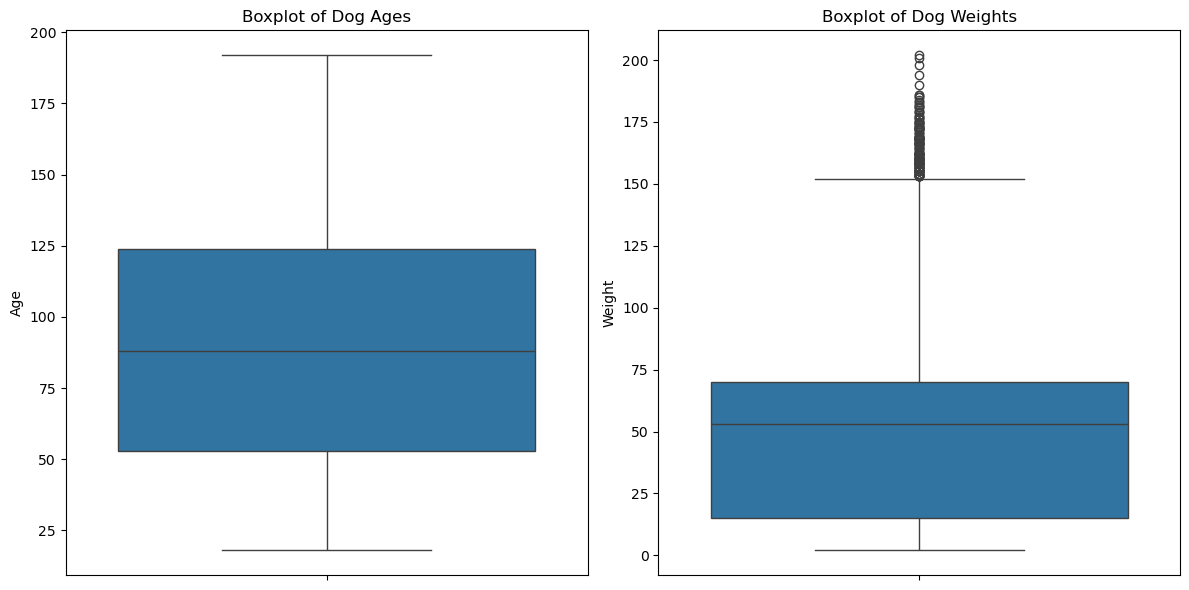

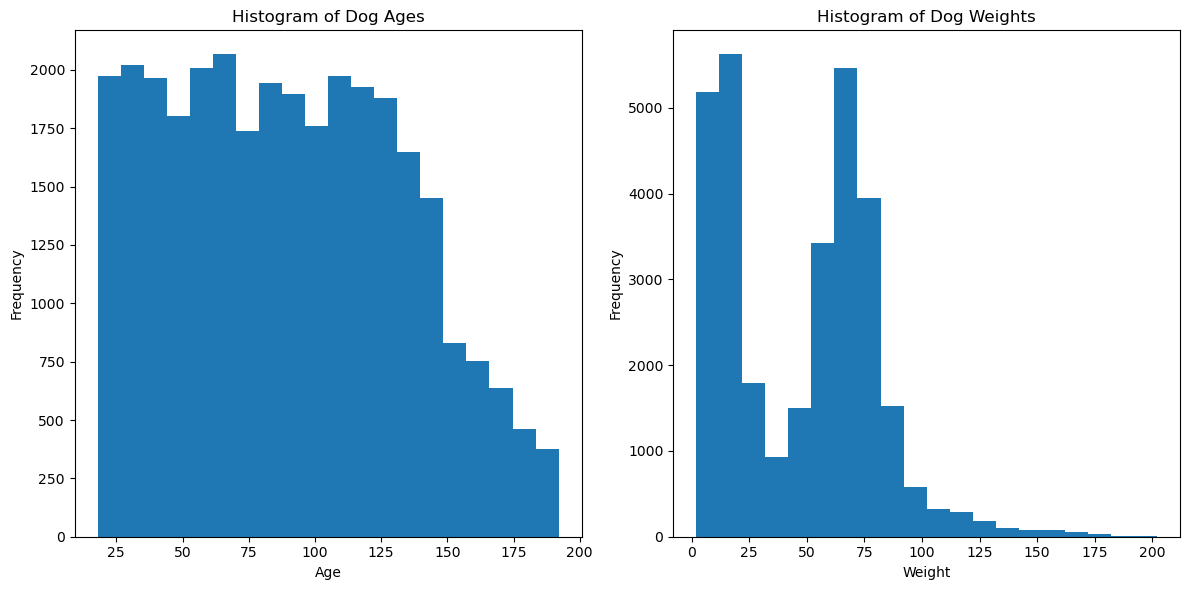

In [73]:
# Step 1: Descriptive statistics for age and weight
age_stats = fully_adult_dogs['Age'].describe()
weight_stats = fully_adult_dogs['Weight'].describe()

print("Descriptive Statistics for Dog Ages:")
print(age_stats)

print("\nDescriptive Statistics for Dog Weights:")
print(weight_stats)

# Step 2: Boxplots for age and weight
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=fully_adult_dogs['Age'])
plt.title('Boxplot of Dog Ages')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=fully_adult_dogs['Weight'])
plt.title('Boxplot of Dog Weights')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()

# Step 3: Histograms for age and weight
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(fully_adult_dogs['Age'], bins=20)
plt.title('Histogram of Dog Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(fully_adult_dogs['Weight'], bins=20)
plt.title('Histogram of Dog Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [75]:
# h. For each of the five most popular dog breeds, produce descriptive statistics, including mean and standard deviation, boxplots, and histograms for all dog ages.  Comment.

Descriptive Statistics for Ages of the Five Most Popular Breeds:
                     count        mean        std   min    25%    50%    75%  \
Breed                                                                          
CHIHUAHUA           1517.0  103.604483  50.788328  18.0  58.00  104.0  148.0   
DACHSHUND           1103.0   92.438803  44.629465  18.0  53.00   92.0  132.0   
LABRADOR RETRIEVER  3263.0   80.604965  36.715995  18.0  49.00   80.0  112.0   
ROTTWEILER           406.0   68.674877  29.046284  18.0  43.25   68.0   95.0   
SHIH TZU            1241.0  106.623691  50.722261  18.0  64.00  109.0  148.0   

                      max  
Breed                      
CHIHUAHUA           192.0  
DACHSHUND           168.0  
LABRADOR RETRIEVER  144.0  
ROTTWEILER          120.0  
SHIH TZU            192.0  


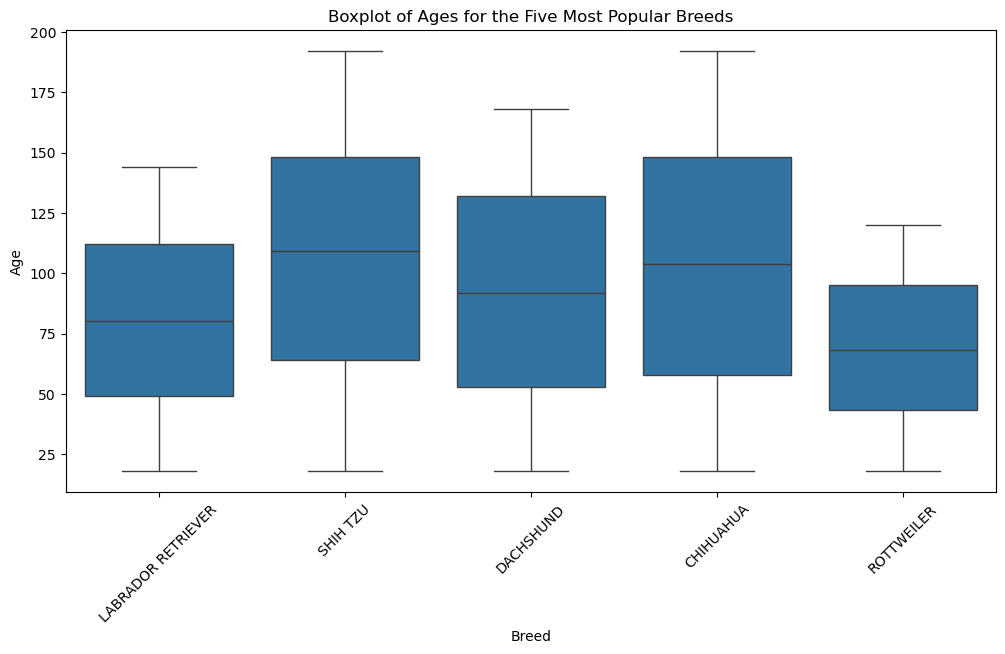

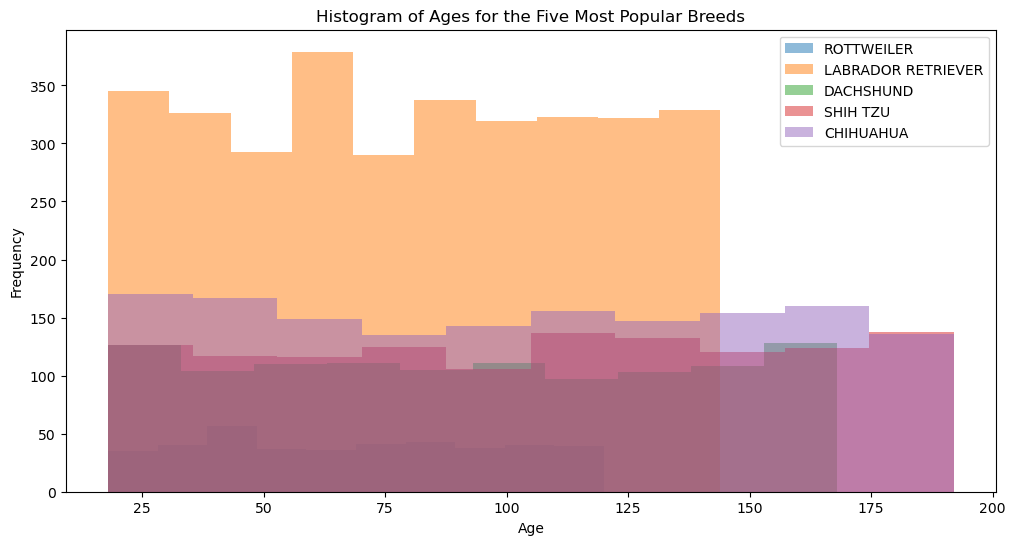

In [77]:
# Step 1: Identify the five most popular breeds
top_breeds = most_popular_breeds['Breed'].head(5).tolist()

# Step 2: Create a new DataFrame for ages of the top breeds
top_breeds_data = fully_adult_dogs[fully_adult_dogs['Breed'].isin(top_breeds)]

# Step 3: Compute descriptive statistics for the ages of the top breeds
breed_age_stats = top_breeds_data.groupby('Breed')['Age'].describe()

print("Descriptive Statistics for Ages of the Five Most Popular Breeds:")
print(breed_age_stats)

# Step 4: Create boxplots for the ages of the top breeds
plt.figure(figsize=(12, 6))
sns.boxplot(x='Breed', y='Age', data=top_breeds_data)
plt.title('Boxplot of Ages for the Five Most Popular Breeds')
plt.xlabel('Breed')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Step 5: Create histograms for the ages of the top breeds
plt.figure(figsize=(12, 6))

for breed in top_breeds:
    plt.hist(top_breeds_data[top_breeds_data['Breed'] == breed]['Age'], 
             bins=10, alpha=0.5, label=breed)

plt.title('Histogram of Ages for the Five Most Popular Breeds')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [79]:
# i. For each of the Giant breeds, produce descriptive statistics, including mean and standard deviation, boxplots, and histograms for all adult (12 months or older) dog weights.  Comment.

Descriptive Statistics for Weights of Adult Giant Breeds:
count    1783.000000
mean      114.751542
std        22.387202
min        91.000000
25%        96.000000
50%       109.000000
75%       125.000000
max       202.000000
Name: Weight, dtype: float64


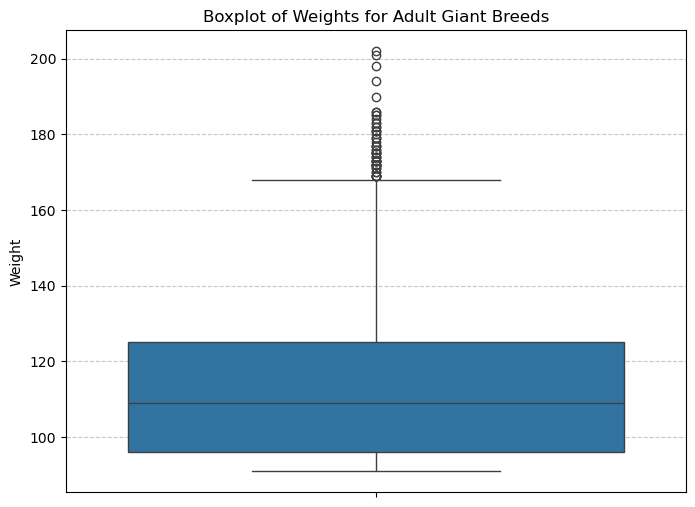

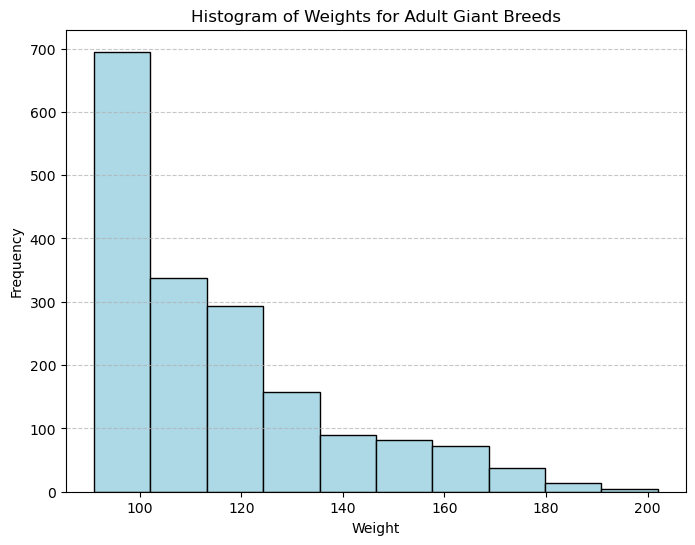

In [81]:
# Step 1: Filter for Giant breeds
giant_breeds = fully_adult_dogs[fully_adult_dogs['Category'] == 'Giant']

# Step 2: Filter for adult dogs (12 months or older)
adult_giant_dogs = giant_breeds[giant_breeds['Age'] >= 12]

# Step 3: Compute descriptive statistics for the weights of adult Giant breeds
weight_stats_giant = adult_giant_dogs['Weight'].describe()

print("Descriptive Statistics for Weights of Adult Giant Breeds:")
print(weight_stats_giant)

# Step 4: Create boxplots for the weights of adult Giant breeds
plt.figure(figsize=(8, 6))
sns.boxplot(y=adult_giant_dogs['Weight'])
plt.title('Boxplot of Weights for Adult Giant Breeds')
plt.ylabel('Weight')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 5: Create histogram for the weights of adult Giant breeds
plt.figure(figsize=(8, 6))
plt.hist(adult_giant_dogs['Weight'], bins=10, color='lightblue', edgecolor='black')
plt.title('Histogram of Weights for Adult Giant Breeds')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [83]:
# j.Produce scatter plots of age vs. weight for five dog breeds of your choice.

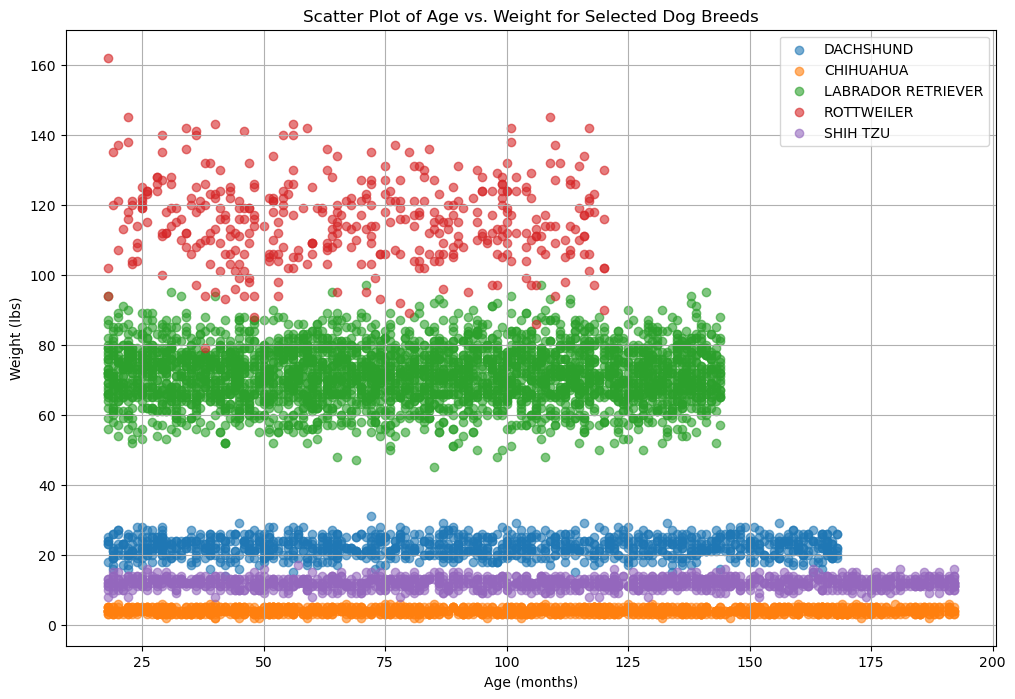

In [89]:
# Step 1: Select five dog breeds of your choice
selected_breeds = ['DACHSHUND', 'CHIHUAHUA', 'LABRADOR RETRIEVER', 'ROTTWEILER', 'SHIH TZU']  # Example breeds

# Step 2: Filter the data for the selected breeds
selected_breeds_data = fully_adult_dogs[fully_adult_dogs['Breed'].isin(selected_breeds)]

# Step 3: Create scatter plots for each breed
plt.figure(figsize=(12, 8))

for breed in selected_breeds:
    breed_data = selected_breeds_data[selected_breeds_data['Breed'] == breed]
    plt.scatter(breed_data['Age'], breed_data['Weight'], label=breed, alpha=0.6)

plt.title('Scatter Plot of Age vs. Weight for Selected Dog Breeds')
plt.xlabel('Age (months)')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.grid(True)
plt.show()